In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import

In [2]:
df = pd.read_csv(r'/Users/kuberdutta/Downloads/archive (8)/fraudTrain.csv')

In [3]:
df.shape

(1296675, 23)

In [4]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
#Class imbalance:
df.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

# Technique to Handle Imbalance:
Because the dataset is too large, we have the luxury to downsample the majority class
which is "Non-Fraud" or 0

In [7]:
df1 = df[df['is_fraud']==0] # This is dataset with 0 values

In [8]:
df2 = df[df['is_fraud']==1] # This is dataset with 1 values

In [9]:
new_df = df1.head(7506)

In [10]:
new_df.shape

(7506, 23)

In [11]:
df2.shape

(7506, 23)

In [12]:
final_df = pd.concat([new_df,df2],axis=0)

In [13]:
final_df.shape

(15012, 23)

In [14]:
final_df.is_fraud.value_counts()

is_fraud
0    7506
1    7506
Name: count, dtype: int64

# EDA

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15012 entries, 0 to 1295733
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15012 non-null  int64  
 1   trans_date_trans_time  15012 non-null  object 
 2   cc_num                 15012 non-null  int64  
 3   merchant               15012 non-null  object 
 4   category               15012 non-null  object 
 5   amt                    15012 non-null  float64
 6   first                  15012 non-null  object 
 7   last                   15012 non-null  object 
 8   gender                 15012 non-null  object 
 9   street                 15012 non-null  object 
 10  city                   15012 non-null  object 
 11  state                  15012 non-null  object 
 12  zip                    15012 non-null  int64  
 13  lat                    15012 non-null  float64
 14  long                   15012 non-null  float64
 15  city_

In [16]:
# Kaunse Merchant hain jinke yahan jyada fraud hota
# Frequency of same amount transaction -- for same customer -- nearby transaction time
# State and City where transactions are more fraud
# Which Category induces more Fraud
# If there is a correlation between age and Fraud?
# If there is a correlation between Job and Fraud?


In [17]:
# Merchant value Counts
len(final_df.merchant.value_counts())

693

In [18]:
# First Question Answered --->>> Merchants that do more Fraud

In [19]:
#We will do Frequency Encoding on this
# Frequency Encoding
freq_encoding = final_df['merchant'].value_counts(normalize=True)
final_df['merchant'] = final_df['merchant'].map(freq_encoding)

In [20]:
final_df['merchant']

0          0.002065
1          0.002864
2          0.001132
3          0.001399
4          0.000933
             ...   
1295399    0.002798
1295491    0.003197
1295532    0.001932
1295666    0.002265
1295733    0.001799
Name: merchant, Length: 15012, dtype: float64

In [21]:
# Now Analyzing the City and State parameters where Fraud Happens More 

In [22]:
df_filtered = final_df[final_df['is_fraud']==1]

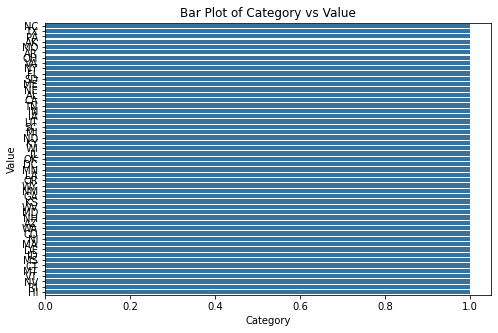

In [23]:
# Create Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(x='is_fraud', y='state', data=df_filtered)

# Labels & Title
plt.xlabel("Category")
plt.ylabel("Value")
plt.title("Bar Plot of Category vs Value")

plt.show()

In [24]:
final_df['is_fraud'].value_counts()

is_fraud
0    7506
1    7506
Name: count, dtype: int64

In [25]:
final_df['state'].value_counts()

state
NY    1037
TX    1012
PA     901
CA     655
OH     587
FL     523
MI     521
IL     509
AL     451
MO     439
VA     392
MN     374
SC     353
AR     349
MD     329
WI     324
NE     323
IA     313
OK     312
NC     308
KS     304
KY     304
WV     303
IN     281
OR     273
GA     262
NJ     256
TN     249
WY     230
MS     223
WA     218
LA     215
ME     213
CO     186
NM     182
VT     139
SD     132
MA     132
ND     126
UT     122
AZ     108
MT     101
NH      94
NV      75
CT      74
AK      50
DC      46
ID      44
HI      32
RI      17
DE       9
Name: count, dtype: int64

In [26]:
final_df.groupby('state', as_index=False)['is_fraud'].sum().sort_values('is_fraud',ascending=False)

,state,is_fraud
34,NY,555
43,TX,479
38,PA,458
4,CA,326
35,OH,321
9,FL,281
14,IL,248
22,MI,238
1,AL,215
23,MN,207


In [27]:
final_df.groupby('city', as_index=False)['is_fraud'].sum().sort_values('is_fraud',ascending=False)

,city,is_fraud
359,Houston,39
832,Warren,33
553,Naples,29
368,Huntsville,29
802,Topeka,27
...,...,...
467,Malad City,0
464,Luray,0
463,Lubbock,0
459,Loving,0


In [28]:
final_df['perc_of_fraud'] = (final_df['is_fraud'].sum() / final_df['is_fraud'].count()) 

In [29]:
final_df[['state','is_fraud','perc_of_fraud']]

,state,is_fraud,perc_of_fraud
0,NC,0,0.5
1,WA,0,0.5
2,ID,0,0.5
3,MT,0,0.5
4,VA,0,0.5
...,...,...,...
1295399,FL,1,0.5
1295491,FL,1,0.5
1295532,LA,1,0.5
1295666,TX,1,0.5


In [30]:
state_fraud = (final_df.groupby('state')['is_fraud'].sum() / final_df.groupby('state')['is_fraud'].count()) * 100
#final_df = final_df.merge(state_fraud.rename('perc_of_fraud'), on='state', how='left')

In [31]:
state_fraud.sort_values()

state
CT     21.621622
HI     21.875000
ID     25.000000
MT     31.683168
AZ     34.259259
LA     42.325581
MO     43.507973
WA     44.036697
NM     45.054945
ND     45.238095
IA     45.367412
DC     45.652174
MI     45.681382
OK     45.833333
NJ     46.093750
AR     46.131805
TX     47.332016
AL     47.671840
MD     47.720365
WY     47.826087
WV     48.184818
NC     48.376623
IL     48.722986
CA     49.770992
UT     50.000000
WI     50.308642
VA     50.510204
IN     50.533808
PA     50.832408
KY     50.986842
KS     51.315789
MS     51.569507
VT     51.798561
MA     52.272727
NY     53.519769
FL     53.728489
OR     54.578755
SC     54.674221
OH     54.684838
MN     55.347594
GA     55.725191
NE     55.727554
ME     55.868545
SD     56.060606
TN     56.224900
CO     60.752688
NV     62.666667
NH     62.765957
AK     72.000000
RI     88.235294
DE    100.000000
Name: is_fraud, dtype: float64

In [32]:
state_fraud.sort_values().index

Index(['CT', 'HI', 'ID', 'MT', 'AZ', 'LA', 'MO', 'WA', 'NM', 'ND', 'IA', 'DC',
       'MI', 'OK', 'NJ', 'AR', 'TX', 'AL', 'MD', 'WY', 'WV', 'NC', 'IL', 'CA',
       'UT', 'WI', 'VA', 'IN', 'PA', 'KY', 'KS', 'MS', 'VT', 'MA', 'NY', 'FL',
       'OR', 'SC', 'OH', 'MN', 'GA', 'NE', 'ME', 'SD', 'TN', 'CO', 'NV', 'NH',
       'AK', 'RI', 'DE'],
      dtype='object', name='state')

In [33]:
df_del = final_df[final_df['state']=='DE']

In [34]:
df_del

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,perc_of_fraud
233631,233631,2019-04-28 00:41:37,6011826317034777,0.002864,grocery_pos,294.91,Christine,Johnson,F,9612 Robert Light Apt. 340,...,-75.3932,18799,"Designer, multimedia",2000-03-16,8f85e701f609911b99bea627eb71aa49,1335573697,38.166715,-75.023367,1,0.5
233744,233744,2019-04-28 01:49:28,6011826317034777,0.001532,misc_net,868.29,Christine,Johnson,F,9612 Robert Light Apt. 340,...,-75.3932,18799,"Designer, multimedia",2000-03-16,8c941f2849ccac44d32ef08ea784fc67,1335577768,38.910900,-74.856625,1,0.5
233826,233826,2019-04-28 02:33:09,6011826317034777,0.002998,grocery_pos,280.26,Christine,Johnson,F,9612 Robert Light Apt. 340,...,-75.3932,18799,"Designer, multimedia",2000-03-16,0fc1109cb9a10961595e79736ccc1293,1335580389,38.523208,-74.460889,1,0.5
234625,234625,2019-04-28 10:24:34,6011826317034777,0.002931,grocery_pos,296.25,Christine,Johnson,F,9612 Robert Light Apt. 340,...,-75.3932,18799,"Designer, multimedia",2000-03-16,b4248cfc8b44fec6193767918d49b334,1335608674,38.593896,-76.031493,1,0.5
236522,236522,2019-04-28 23:03:24,6011826317034777,0.000666,health_fitness,20.58,Christine,Johnson,F,9612 Robert Light Apt. 340,...,-75.3932,18799,"Designer, multimedia",2000-03-16,567ed9b2d7d10ad519cdd697cd338f70,1335654204,39.003922,-75.852152,1,0.5
236643,236643,2019-04-28 23:41:43,6011826317034777,0.004730,shopping_net,1012.77,Christine,Johnson,F,9612 Robert Light Apt. 340,...,-75.3932,18799,"Designer, multimedia",2000-03-16,00d158609d7ac753da792e9d0eb88a0b,1335656503,39.596186,-75.559281,1,0.5
237095,237095,2019-04-29 03:29:41,6011826317034777,0.001732,misc_net,885.96,Christine,Johnson,F,9612 Robert Light Apt. 340,...,-75.3932,18799,"Designer, multimedia",2000-03-16,e0613e4142b2d05867299832ac453e01,1335670181,39.666374,-76.358642,1,0.5
237740,237740,2019-04-29 10:13:47,6011826317034777,0.000600,grocery_net,10.93,Christine,Johnson,F,9612 Robert Light Apt. 340,...,-75.3932,18799,"Designer, multimedia",2000-03-16,788a8fea8199a4e8a6a47ffab824e571,1335694427,37.691598,-76.058416,1,0.5
239854,239854,2019-04-29 23:51:22,6011826317034777,0.002665,shopping_net,960.49,Christine,Johnson,F,9612 Robert Light Apt. 340,...,-75.3932,18799,"Designer, multimedia",2000-03-16,4193b953223a1c9432f9d3c380e67be9,1335743482,39.073319,-75.545153,1,0.5


In [35]:
city_fraud = round(final_df.groupby('city')['is_fraud'].sum() / final_df.groupby('city')['is_fraud'].count(),2)

In [36]:
city_fraud.sort_values(ascending=False)

city
Melville      1.0
Nanuet        1.0
Waukau        1.0
Phelps        1.0
East China    1.0
             ... 
Malad City    0.0
Luray         0.0
Lubbock       0.0
Loving        0.0
Zavalla       0.0
Name: is_fraud, Length: 889, dtype: float64

In [37]:
final_df.select_dtypes(include='object').columns

Index(['trans_date_trans_time', 'category', 'first', 'last', 'gender',
       'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

# We Are now going to Convert State to Ordinal Encoding: We are going to ensure that state with Highest Fraud gets Highest number, State with lowest gets Lowest Number and everything else in between.

In [38]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories
categories = [['CT', 'HI', 'ID', 'MT', 'AZ', 'LA', 'MO', 'WA', 'NM', 'ND', 'IA', 'DC',
       'MI', 'OK', 'NJ', 'AR', 'TX', 'AL', 'MD', 'WY', 'WV', 'NC', 'IL', 'CA',
       'UT', 'WI', 'VA', 'IN', 'PA', 'KY', 'KS', 'MS', 'VT', 'MA', 'NY', 'FL',
       'OR', 'SC', 'OH', 'MN', 'GA', 'NE', 'ME', 'SD', 'TN', 'CO', 'NV', 'NH',
       'AK', 'RI', 'DE']]

# Initialize Encoder
encoder = OrdinalEncoder(categories=categories)

# Fit and Transform
final_df['state_2'] = encoder.fit_transform(final_df[['state']])



In [39]:
final_df['state_2'].value_counts()

state_2
34.0    1037
16.0    1012
28.0     901
23.0     655
38.0     587
35.0     523
12.0     521
22.0     509
17.0     451
6.0      439
26.0     392
39.0     374
37.0     353
15.0     349
18.0     329
25.0     324
41.0     323
10.0     313
13.0     312
21.0     308
30.0     304
29.0     304
20.0     303
27.0     281
36.0     273
40.0     262
14.0     256
44.0     249
19.0     230
31.0     223
7.0      218
5.0      215
42.0     213
45.0     186
8.0      182
32.0     139
43.0     132
33.0     132
9.0      126
24.0     122
4.0      108
3.0      101
47.0      94
46.0      75
0.0       74
48.0      50
11.0      46
2.0       44
1.0       32
49.0      17
50.0       9
Name: count, dtype: int64

# Now Handling City Column but in a different way 

In [40]:
city_fraud = (final_df.groupby('city')['is_fraud'].sum() / final_df.groupby('city')['is_fraud'].count())
final_df = final_df.merge(city_fraud.rename('city_fraud'), on='city', how='left')

In [41]:
final_df.select_dtypes(include='object').columns

Index(['trans_date_trans_time', 'category', 'first', 'last', 'gender',
       'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [42]:
# Drop First, last from the dataset as they contribute to nothing

final_df = final_df.drop(['first','last','state','city'],axis=1)

In [43]:
final_df.select_dtypes(include='object').columns

Index(['trans_date_trans_time', 'category', 'gender', 'street', 'job', 'dob',
       'trans_num'],
      dtype='object')

In [44]:
final_df['gender'].value_counts()

gender
F    7863
M    7149
Name: count, dtype: int64

In [45]:
final_df['gender'] = final_df['gender'].replace('M',0)

In [46]:
final_df['gender'] = final_df['gender'].replace('F',1)

In [47]:
final_df['gender'].value_counts()

gender
1    7863
0    7149
Name: count, dtype: int64

In [48]:
final_df.select_dtypes(include='object').columns

Index(['trans_date_trans_time', 'category', 'street', 'job', 'dob',
       'trans_num'],
      dtype='object')

# Now Dealing with Category , first to ensure that Fraud has some sort of relation with Category , lets do EDA

In [49]:
final_df['category'].value_counts()

category
grocery_pos       2482
shopping_net      2249
shopping_pos      1483
gas_transport     1393
misc_net          1299
home               959
kids_pets          899
personal_care      766
entertainment      763
food_dining        677
misc_pos           676
health_fitness     631
grocery_net        399
travel             336
Name: count, dtype: int64

In [50]:
category_fraud = (final_df.groupby('category')['is_fraud'].sum() / final_df.groupby('category')['is_fraud'].count()) * 100

In [51]:
category_fraud.sort_values()

category
home              20.646507
health_fitness    21.077655
food_dining       22.304284
kids_pets         26.585095
personal_care     28.720627
entertainment     30.537353
grocery_net       33.583960
travel            34.523810
misc_pos          36.982249
gas_transport     44.364681
shopping_pos      56.844235
grocery_pos       70.225624
misc_net          70.438799
shopping_net      76.167185
Name: is_fraud, dtype: float64

In [52]:
category_fraud.sort_values().index

Index(['home', 'health_fitness', 'food_dining', 'kids_pets', 'personal_care',
       'entertainment', 'grocery_net', 'travel', 'misc_pos', 'gas_transport',
       'shopping_pos', 'grocery_pos', 'misc_net', 'shopping_net'],
      dtype='object', name='category')

In [53]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories
categories = [['home', 'health_fitness', 'food_dining', 'kids_pets', 'personal_care',
       'entertainment', 'grocery_net', 'travel', 'misc_pos', 'gas_transport',
       'shopping_pos', 'grocery_pos', 'misc_net', 'shopping_net']]

# Initialize Encoder
encoder = OrdinalEncoder(categories=categories)

# Fit and Transform
final_df['category'] = encoder.fit_transform(final_df[['category']])

In [54]:
final_df.select_dtypes(include='object').columns

Index(['trans_date_trans_time', 'street', 'job', 'dob', 'trans_num'], dtype='object')

In [55]:
len(final_df['job'].value_counts())

494

In [56]:
job_fraud = (final_df.groupby('job')['is_fraud'].sum() / final_df.groupby('job')['is_fraud'].count()) * 100

In [57]:
job_fraud.sort_values(ascending=False)

job
Ship broker                        100.0
Engineer, site                     100.0
Armed forces technical officer     100.0
Producer, television/film/video    100.0
Careers adviser                    100.0
                                   ...  
Teaching laboratory technician       0.0
Engineer, communications             0.0
Television camera operator           0.0
Engineer, civil (contracting)        0.0
Insurance broker                     0.0
Name: is_fraud, Length: 494, dtype: float64

In [58]:
final_df = final_df.merge(job_fraud.rename('job_fraud'), on='job', how='left')

In [59]:
final_df['job_fraud']

0        21.428571
1        19.642857
2        61.538462
3        51.282051
4         0.000000
           ...    
15007    29.032258
15008    29.032258
15009    33.333333
15010    27.500000
15011    33.333333
Name: job_fraud, Length: 15012, dtype: float64

In [60]:
final_df.select_dtypes(include='object').columns

Index(['trans_date_trans_time', 'street', 'job', 'dob', 'trans_num'], dtype='object')

In [61]:
street_fraud = (final_df.groupby('street')['is_fraud'].sum() / final_df.groupby('street')['is_fraud'].count()) * 100

In [62]:
final_df = final_df.merge(street_fraud.rename('street_fraud'), on='street', how='left')

In [63]:
final_df[['street','street_fraud']].sort_values('street_fraud',ascending=False)

,street,street_fraud
13043,8206 Harris Extensions Apt. 996,100.0
8769,56261 Keith Plaza,100.0
8757,01770 Kevin Lodge Suite 190,100.0
8759,01770 Kevin Lodge Suite 190,100.0
8762,56261 Keith Plaza,100.0
...,...,...
5014,9572 Austin Forge Suite 612,0.0
5017,555 Michael Burgs,0.0
5018,11014 Chad Lake Apt. 573,0.0
5022,561 Perry Cove,0.0


In [64]:
final_df['street'].value_counts().sort_values(ascending=False)

street
615 Clarke Spring Apt. 172        40
2870 Bean Terrace Apt. 756        37
2924 Bobby Trafficway             37
854 Walker Dale Suite 488         37
3645 Atkins Island Apt. 238       36
                                  ..
5537 Jessica Plaza                 1
6313 Scott Trace                   1
87198 Macias Drive Suite 389       1
17355 Mendoza Bypass Suite 059     1
022 Moore Island                   1
Name: count, Length: 977, dtype: int64

In [65]:
street_fraud_sum= final_df.groupby('street')['is_fraud'].sum() 

In [66]:
final_df = final_df.merge(street_fraud_sum.rename('street_fraud_sum'), on='street', how='left')

In [67]:
final_df['street_fraud_sum']

0         0
1         0
2         0
3        15
4         0
         ..
15007     3
15008     3
15009     2
15010     6
15011     2
Name: street_fraud_sum, Length: 15012, dtype: int64

In [68]:
street_fraud_count= final_df.groupby('street')['is_fraud'].count() 

In [69]:
final_df = final_df.merge(street_fraud_count.rename('street_fraud_count'), on='street', how='left')

In [75]:
final_df[['street','street_fraud_count','street_fraud_sum']].sort_values('street_fraud_count',ascending=False)

,street,street_fraud_count,street_fraud_sum
5302,615 Clarke Spring Apt. 172,40,12
7253,615 Clarke Spring Apt. 172,40,12
8305,615 Clarke Spring Apt. 172,40,12
1570,615 Clarke Spring Apt. 172,40,12
1352,615 Clarke Spring Apt. 172,40,12
...,...,...,...
2594,96122 Steven Flat,1,0
1024,6313 Scott Trace,1,0
5928,17355 Mendoza Bypass Suite 059,1,0
105,022 Moore Island,1,0


In [76]:
final_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'gender', 'street', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'perc_of_fraud', 'state_2', 'city_fraud', 'job_fraud', 'street_fraud',
       'street_fraud_sum', 'street_fraud_count'],
      dtype='object')

In [77]:
final_df.drop(['street_fraud','street_fraud_count'],axis=1,inplace=True) # so ultimatey we understod that the sum of Fraud for any street will
# be a determining factor to annouce that particular street is fraud_prone

###  so ultimatey we understod that the sum of Fraud for any street will
### be a determining factor to annouce that particular street is fraud_prone

In [78]:
final_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,street,zip,lat,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,perc_of_fraud,state_2,city_fraud,job_fraud,street_fraud_sum
0,0,2019-01-01 00:00:18,2703186189652095,0.002065,12.0,4.97,1,561 Perry Cove,28654,36.0788,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0.5,21.0,0.000000,21.428571,0
1,1,2019-01-01 00:00:44,630423337322,0.002864,11.0,107.23,1,43039 Riley Greens Suite 393,99160,48.8878,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0.5,7.0,0.000000,19.642857,0
2,2,2019-01-01 00:00:51,38859492057661,0.001132,5.0,220.11,0,594 White Dale Suite 530,83252,42.1808,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0.5,2.0,0.000000,61.538462,0
3,3,2019-01-01 00:01:16,3534093764340240,0.001399,9.0,45.00,0,9443 Cynthia Court Apt. 038,59632,46.2306,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0.5,3.0,0.789474,51.282051,15
4,4,2019-01-01 00:03:06,375534208663984,0.000933,8.0,41.96,0,408 Bradley Rest,24433,38.4207,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0.5,26.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,1295399,2020-06-21 01:00:08,3524574586339330,0.002798,13.0,977.01,1,94225 Smith Springs Apt. 617,32960,27.6330,...,a83b093f0c1d9068fa0089f7c722615f,1371776408,26.888686,-80.834389,1,0.5,35.0,0.176471,29.032258,3
15008,1295491,2020-06-21 01:53:35,3524574586339330,0.003197,13.0,1210.91,1,94225 Smith Springs Apt. 617,32960,27.6330,...,f75b35bed13b9e692f170dba45a15b21,1371779615,28.216707,-79.855648,1,0.5,35.0,0.176471,29.032258,3
15009,1295532,2020-06-21 02:16:56,4005676619255478,0.001932,9.0,10.24,0,458 Phillips Island Apt. 768,70726,30.4590,...,a0ba2472cd3fc9731f2a18d3f308f5c3,1371781016,29.700456,-91.361632,1,0.5,5.0,0.166667,33.333333,2
15010,1295666,2020-06-21 03:26:20,3560725013359375,0.002265,9.0,21.69,1,63542 Luna Brook Apt. 012,79759,31.8599,...,daa281350b1e16093c7b4bf97bf4d6ed,1371785180,32.675272,-103.484949,1,0.5,16.0,0.400000,27.500000,6


In [80]:
final_df.select_dtypes(include='object').columns

Index(['trans_date_trans_time', 'street', 'job', 'dob', 'trans_num'], dtype='object')

In [82]:
final_df.drop(['street','job','trans_num'],axis=1,inplace=True)

In [90]:
final_df['trans_date_trans_time'] = pd.to_datetime(final_df['trans_date_trans_time'])

In [91]:
final_df['trans_date_trans_time'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15012 entries, 0 to 15011
Series name: trans_date_trans_time
Non-Null Count  Dtype         
--------------  -----         
15012 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 117.4 KB


In [92]:
final_df.select_dtypes(include='object').columns

Index(['dob'], dtype='object')

In [93]:
final_df['dob'] 

0        1988-03-09
1        1978-06-21
2        1962-01-19
3        1967-01-12
4        1986-03-28
            ...    
15007    1986-05-07
15008    1986-05-07
15009    1994-05-31
15010    1969-09-15
15011    1994-05-31
Name: dob, Length: 15012, dtype: object

In [98]:
final_df['dob'] = pd.to_datetime(final_df['dob'],errors='coerce').dt.date 

In [99]:
final_df['dob'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15012 entries, 0 to 15011
Series name: dob
Non-Null Count  Dtype 
--------------  ----- 
15012 non-null  object
dtypes: object(1)
memory usage: 117.4+ KB


In [100]:
final_df['dob'] = pd.to_datetime(final_df['dob']).dt.floor('D')

In [101]:
final_df['dob'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15012 entries, 0 to 15011
Series name: dob
Non-Null Count  Dtype         
--------------  -----         
15012 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 117.4 KB


In [102]:
final_df.select_dtypes(include='object').columns

Index([], dtype='object')

In [103]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15012 entries, 0 to 15011
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             15012 non-null  int64         
 1   trans_date_trans_time  15012 non-null  datetime64[ns]
 2   cc_num                 15012 non-null  int64         
 3   merchant               15012 non-null  float64       
 4   category               15012 non-null  float64       
 5   amt                    15012 non-null  float64       
 6   gender                 15012 non-null  int64         
 7   zip                    15012 non-null  int64         
 8   lat                    15012 non-null  float64       
 9   long                   15012 non-null  float64       
 10  city_pop               15012 non-null  int64         
 11  dob                    15012 non-null  datetime64[ns]
 12  unix_time              15012 non-null  int64         
 13  m

In [104]:
final_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,gender,zip,lat,long,...,dob,unix_time,merch_lat,merch_long,is_fraud,perc_of_fraud,state_2,city_fraud,job_fraud,street_fraud_sum
0,0,2019-01-01 00:00:18,2703186189652095,0.002065,12.0,4.97,1,28654,36.0788,-81.1781,...,1988-03-09,1325376018,36.011293,-82.048315,0,0.5,21.0,0.000000,21.428571,0
1,1,2019-01-01 00:00:44,630423337322,0.002864,11.0,107.23,1,99160,48.8878,-118.2105,...,1978-06-21,1325376044,49.159047,-118.186462,0,0.5,7.0,0.000000,19.642857,0
2,2,2019-01-01 00:00:51,38859492057661,0.001132,5.0,220.11,0,83252,42.1808,-112.2620,...,1962-01-19,1325376051,43.150704,-112.154481,0,0.5,2.0,0.000000,61.538462,0
3,3,2019-01-01 00:01:16,3534093764340240,0.001399,9.0,45.00,0,59632,46.2306,-112.1138,...,1967-01-12,1325376076,47.034331,-112.561071,0,0.5,3.0,0.789474,51.282051,15
4,4,2019-01-01 00:03:06,375534208663984,0.000933,8.0,41.96,0,24433,38.4207,-79.4629,...,1986-03-28,1325376186,38.674999,-78.632459,0,0.5,26.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,1295399,2020-06-21 01:00:08,3524574586339330,0.002798,13.0,977.01,1,32960,27.6330,-80.4031,...,1986-05-07,1371776408,26.888686,-80.834389,1,0.5,35.0,0.176471,29.032258,3
15008,1295491,2020-06-21 01:53:35,3524574586339330,0.003197,13.0,1210.91,1,32960,27.6330,-80.4031,...,1986-05-07,1371779615,28.216707,-79.855648,1,0.5,35.0,0.176471,29.032258,3
15009,1295532,2020-06-21 02:16:56,4005676619255478,0.001932,9.0,10.24,0,70726,30.4590,-90.9027,...,1994-05-31,1371781016,29.700456,-91.361632,1,0.5,5.0,0.166667,33.333333,2
15010,1295666,2020-06-21 03:26:20,3560725013359375,0.002265,9.0,21.69,1,79759,31.8599,-102.7413,...,1969-09-15,1371785180,32.675272,-103.484949,1,0.5,16.0,0.400000,27.500000,6


In [ ]:
#